# Convolutional Neural Network (CNN)

## Digital Image

suatu gambar digital merupakan suatu array yang dapat terdiri dari array 3 dimensi. dimensi pertama merupakan tinggi gambar, dimensi kedua merupakan lebar gambar dan dimensi ketiga merupakan kanal warna (*color channel*) dari gambar. Pada gambar RGB color channel terdiri dari channel Merah (R), Hijau (G) dan Biru (B). pada umumnya, gambar RGB memiliki terdiri dari tipe data  `UINT8` yang terdiri dari nilai interger 0-255. nilai pada setiap pixel menunjukan kecerahan warna pada pixel tersebut. nilai 0 menunjukan warna hitam dan nilai 255 menunjukan warna putih. menggunakan warna RGB kombinasi warna dapat dicapai dengan mengganti ration kecerahan warna pada setiap pixel. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Beyoglu_4671_tricolor.png/400px-Beyoglu_4671_tricolor.png)

## Preprocessing

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Pada latihan ini digunakan dataset dari **[cifar10](https://www.cs.toronto.edu/~kriz/cifar.html)** yang merupakan dataset yang terdiri dari 6000 gambar dengan 10 kelas. dataset yang digunakan sudah disiapkan oleh keras yang dapat dipanggil menggunakan syntax `keras.datasets.cifar10.load_data()`. Pada CNN, data image yang digunakan harus memiliki dimensi yang sama, maka data yang digunakan harus memiliki panjang dan lebar yang sama. 




pada dataset cifar 10, gambar memiliki dimensi 32x32 pixel. gambar pada dataset CNN seperti Cifar 10 pada umumnya memiliki ukuran dimensi yang cukup rendah dikarenakan oleh *Curse of Dimentionality*. *Curse of Dimentionality* merupakan fenomena dimana semakin banyak dimensi yang dimiliki suatu data semakin besar pengaruh peningkatan setiap ukuran pada dimensi. pada contohnya:

pada perkalian nilai 2:

\begin{align}
2 ^ 1  = 2\\ 
2 ^ 2  = 4\\ 
2 ^ 3  = 8\\ 
\end{align}

pada perkalian nilai 3:

\begin{align}
3 ^ 1  = 3\\ 
3 ^ 2  = 9\\ 
3 ^ 3  = 27\\ 
\end{align}


terlihat pada nilai $x^1$ perbedaan dari nilai $x=2$ dan $x=3$ adalah $1$. Sedangkan pada $x^2$ perbedaan yang dimiliki adalah $5$ dan pada $x^3$ adalah $19$. Terlihat bahwa banyaknya data meningkat secara drastis pada data berdimensi tinggi.

pada data **cifar10** terdapat 1024 datapoint ($32*32$) sedangkan bila data terdiri dari dengan dimensi 64x64 terdapat 4096 datapoint yang akan meningkatkan waktu pengolahan data secara signifikan.



In [0]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

Dikarenakan akan dilakukan klasifikasi terhadap data yang ada, maka data di normalisasi menjadi range 0 hingga 1. Dikarenakan nilai maksimal dari data merupakan 255, setiap nilai pada pixel akan dibagi dengan nilai 255. 

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Kelas pada data cifar10 dapat dilihat pada `class_name` 

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Berikut merupakan visualisasi dari beberapa data menggunakan `matplotlib`

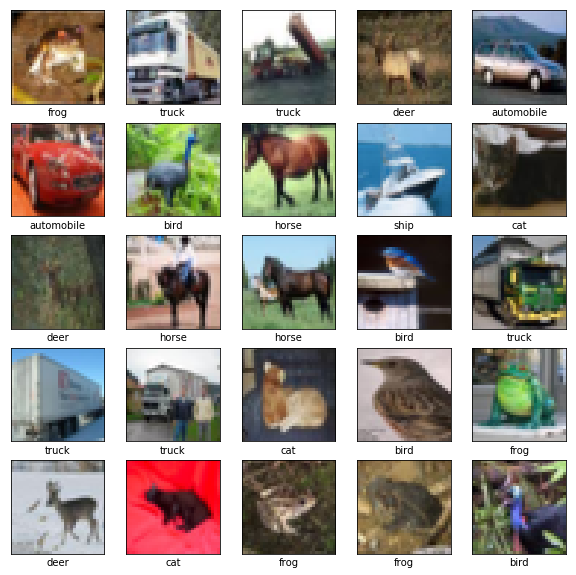

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Making the Model


### Convolutional Layer
Berikut merupakan model CNN yang akan digunakan, terlihat beberapa jenis layer yang umum digunakan pada CNN. CNN menggunakan layer model convolutional dimana sebuah window akan digeser pada image, setiap window akan dibaca sebagai sebuah perceptron baru pada CNN. CNN sangat efektif digunakan pada model Neural Network untuk pengolahan gambar dikarenakan tersimpanya hubungan antara data secara spasial tanpa menggunakan koneksi penuh pada seluruh input secara bersamaan seperti layer `Dense`. layer pada Convolutional 2-Dimensi dapat digunakan pada `keras` menggunakan 
**`keras.layers.Conv2D(n_feature, (window_height,window_width))`** dengan penjelasa berikut:
* `n_feature` : merupakan banyaknya noda yang dihasilkan untuk setiap window
* `window_height` : merupakan tinggi dari window yang digunakan untuk konvolusi
* `window_width` : merupakan lebar dari window untuk digunakan untuk konvolusi

![alt text](https://ds055uzetaobb.cloudfront.net/brioche/uploads/MDyKhb5tXY-1_hbp1vrfewnareprrlnxtqq2x.png?width=1200)






### Pooling Layer

Pooling merupaka salah satu metode untuk mengurangi waktu komputasi pada CNN dengan melakukan downsampling. pada layer pooling, akan dilakukan operasi matematis seperti maximum dan average dari suatu window. dengan menggunakan pooling banyaknya input yang harus dioperasikan pada layer selanjutnya akan berkurang sesuai besar window yang digunakan. namun pooling mengurangi banyaknya informasi yang dapat didapatkan dari suatu layer. Parameter pada layer pooling tidak akan berubah atau dalam kata lain layer pooling tidak dilatih karena layer pooling melakukan operasi matematis yang sama. pooling dapat digunakan pada `keras` dengan :

* `keras.layers.MaxPooling2D((window_height,window_width))` untuk melakukan Max pooling
* `keras.layers.AveragePooling2D((window_height,window_width))` untuk melakukan Average pooling

![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_4/Pooling_Simple_max.png)



### Flatten Layer
layer flatten merupakan layer yang digunakna untuk mengubah suatu layer 2-dimensi menjadi 1 dimensi. flatten digunakan untuk menghubungkan layer 2-dimensi dengan layer 1-dimensi seperti layer dense untuk pengolahan lebih lanjut. 

![alt text](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

### Activation Functions
Terlihat pada layer model terdapat beberapa jenis fungsi aktivasi yang digunakan.

* layer convolutional menggunakan fungsi aktivasi **`relu`**, fungsi `relu` digunakan dikarenakan gambar tidak memiliki nilai negatif yang menyebabkan fungsi relu cocok untuk digunakan pada layer convolusi. `relu` juga memiliki keuntungan dikarenakan kecepatan proses fungsi aktivasi relu. selain itu, dikarenakan data sudah dinormalisasi, maka fungsi relu baik digunakan untuk mengekstrak fitur-fitur yang diinginkan. 

* layer Dense menggunakan fungsi aktivasi **`sigmoid`** dikarenakan fungsi `sigmoid` cocok digunakan pada masalah klasifikasi yang menentukan kelas pada nilai antara 0 hingga 1. 

* layer Dense akhir menggunakan fungsi aktivasi **'softmax'**, `softmax` merupakan fungsi aktivasi yang menyebabkan nilai total dari seluruh outputnya merupakan 1. softmax berguna pada klasifikasi multi kelas untuk menonjolkan kelas yang dipilih dan meminimalkan nilai kelas yang tidak sesuai. 

![alt text](https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png)

![alt text](https://miro.medium.com/max/1812/1*670CdxchunD-yAuUWdI7Bw.png)

In [6]:
model = keras.Sequential([
  keras.layers.Conv2D(32, (4,4), activation=tf.nn.relu, input_shape=(32, 32, 3)),
  keras.layers.MaxPooling2D((2,2)),
  keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
  keras.layers.AveragePooling2D((2,2)),
  keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation=tf.nn.sigmoid),
  keras.layers.Dense(64, activation=tf.nn.sigmoid),
  keras.layers.Dense(32, activation=tf.nn.sigmoid),
  keras.layers.Dense(10, activation=tf.nn.softmax),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Untuk melihat banyak parameter dan parameter pada layer apa saja yang akan dilatih, dapat dilihat pada `model.summary()`

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

## Training the Model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.8889 - acc: 0.2970 - val_loss: 1.6221 - val_acc: 0.4098
Epoch 2/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.5007 - acc: 0.4543 - val_loss: 1.4110 - val_acc: 0.4898
Epoch 3/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.3476 - acc: 0.5155 - val_loss: 1.2913 - val_acc: 0.5387
Epoch 4/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 1.2291 - acc: 0.5627 - val_loss: 1.2220 - val_acc: 0.5712
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1282 - acc: 0.6007 - val_loss: 1.1502 - val_acc: 0.5925
Epoch 6/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.0487 - acc: 0.6303 - val_loss: 1.1411 - val_acc: 0.5944
Epoch 7/10
50000/50000 [==============================] - 68s 1ms/sample - loss: 0.9852 - acc: 0.6551 - val_loss: 1.

10000/10000 - 4s - loss: 0.9876 - acc: 0.6630


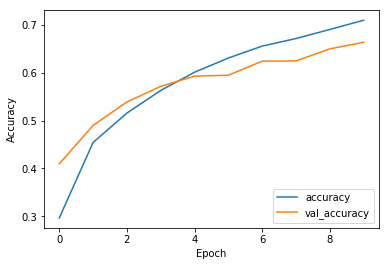

In [9]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)